TASK:
Comparing Weekend and Weekday Sales in Q4 2022 Scenario: The Campaign Team wants to evaluate the effectiveness of their weekend promotional campaigns (Saturdays and Sundays) between October and December 2022 by comparing the average daily sales during weekends vs weekdays. Requirements: 1. Calculate the average daily sales (before_discount) for weekends (Saturdays and Sundays) and weekdays (Monday to Friday) for each month (October, November, and December 2022). 2. Calculate the average sales for weekends vs weekdays for the entire three-month period. 3. Share insights on whether sales increased during weekends. Key Features to Use: • order_date (for filtering by date and identifying days of the week) • before_discount (for sales data) • month_id, month_name, day_name, year (for extracting date-related information)


In [3]:
import pandas as pd

# Load the dataset
order_detail = pd.read_csv(r"C:\Users\Hxtreme\Desktop\nullnew\order_detail.csv")

# Convert 'order_date' to datetime
order_detail['order_date'] = pd.to_datetime(order_detail['order_date'])

# Filter for Q4 2022 (October, November, December)
q4_data = order_detail[
    (order_detail['order_date'].dt.year == 2022) &
    (order_detail['order_date'].dt.month.isin([10, 11, 12]))
]

# Create month_name and day_name columns
q4_data['month_name'] = q4_data['order_date'].dt.strftime('%B')
q4_data['day_name'] = q4_data['order_date'].dt.day_name()

# Create a new column for 'Weekend' or 'Weekday'
q4_data['day_type'] = q4_data['day_name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Grouping: calculate total daily sales
daily_sales = q4_data.groupby(['month_name', 'day_type', 'order_date']).agg(
    daily_sales=('before_discount', 'sum')
).reset_index()

# Calculate the average daily sales by month and day type
average_daily_sales_month = daily_sales.groupby(['month_name', 'day_type']).agg(
    avg_daily_sales=('daily_sales', 'mean')
).reset_index()

# Format the 'avg_daily_sales' column to have commas for better readability
average_daily_sales_month['avg_daily_sales'] = average_daily_sales_month['avg_daily_sales'].apply(lambda x: f"{x:,.0f}")

# Rename columns to match the required format
average_daily_sales_month.rename(columns={'month_name': 'Month', 'day_type': 'Day_Type', 'avg_daily_sales': 'Average_Sales'}, inplace=True)

# Display the final dataframe
print(average_daily_sales_month)


      Month Day_Type Average_Sales
0  December  Weekday    13,485,287
1  December  Weekend    14,624,409
2  November  Weekday    18,889,722
3  November  Weekend    15,170,130
4   October  Weekday    16,094,024
5   October  Weekend    14,624,371


C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_13164\1212130688.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_data['month_name'] = q4_data['order_date'].dt.strftime('%B')
C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_13164\1212130688.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_data['day_name'] = q4_data['order_date'].dt.day_name()
C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_13164\1212130688.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

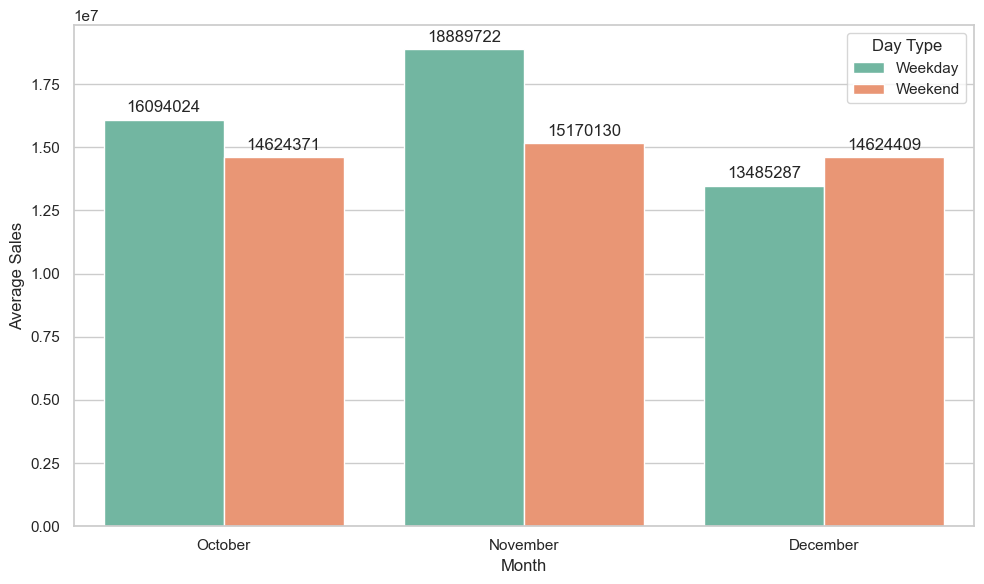

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set_theme(style="whitegrid")

# Convert 'Average_Sales' to numeric if it's not already
average_daily_sales_month['Average_Sales'] = average_daily_sales_month['Average_Sales'].replace(',', '', regex=True).astype(float)

# Define the order of months for consistent plotting
month_order = ['October', 'November', 'December']

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=average_daily_sales_month,
    x='Month',
    y='Average_Sales',
    hue='Day_Type',
    order=month_order,
    palette='Set2'
)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Set plot titles and labels
plt.ylabel('Average Sales')
plt.xlabel('Month')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()
